In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 读取 mnist 数据
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [3]:
# reshape
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test = x_test_image.reshape(10000,784).astype('float32')

In [4]:
# 特征标准化，label one-hot编码
x_train_normalize=x_train / 255
x_test_normalize = x_test / 255

y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)


In [5]:
##################################
# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [9]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
###########################################
# 进行训练

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
train_history = model.fit(x=x_train_normalize,
                         y=y_train_onehot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=200,
                         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4384 - acc: 0.8827 - val_loss: 0.2182 - val_acc: 0.9407
Epoch 2/10
 - 1s - loss: 0.1911 - acc: 0.9453 - val_loss: 0.1559 - val_acc: 0.9553
Epoch 3/10
 - 1s - loss: 0.1358 - acc: 0.9614 - val_loss: 0.1263 - val_acc: 0.9651
Epoch 4/10
 - 1s - loss: 0.1031 - acc: 0.9704 - val_loss: 0.1123 - val_acc: 0.9677
Epoch 5/10
 - 1s - loss: 0.0813 - acc: 0.9771 - val_loss: 0.0984 - val_acc: 0.9715
Epoch 6/10
 - 1s - loss: 0.0661 - acc: 0.9816 - val_loss: 0.0944 - val_acc: 0.9715
Epoch 7/10
 - 1s - loss: 0.0546 - acc: 0.9850 - val_loss: 0.0915 - val_acc: 0.9733
Epoch 8/10
 - 1s - loss: 0.0461 - acc: 0.9875 - val_loss: 0.0834 - val_acc: 0.9758
Epoch 9/10
 - 1s - loss: 0.0382 - acc: 0.9901 - val_loss: 0.0826 - val_acc: 0.9763
Epoch 10/10
 - 1s - loss: 0.0319 - acc: 0.9917 - val_loss: 0.0807 - val_acc: 0.9764


In [14]:
import  matplotlib.pyplot as plt
def show_train_history(train_history, train,validation):
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.plot(train_history.history[train])
    ax.plot(train_history.history[validation])
    
    ax.set_title("Train History")
    ax.set_xlabel('Epoch')
    ax.set_ylabel(train)
    ax.legend(['train','validation'],loc='upper left')
    fig.show()

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


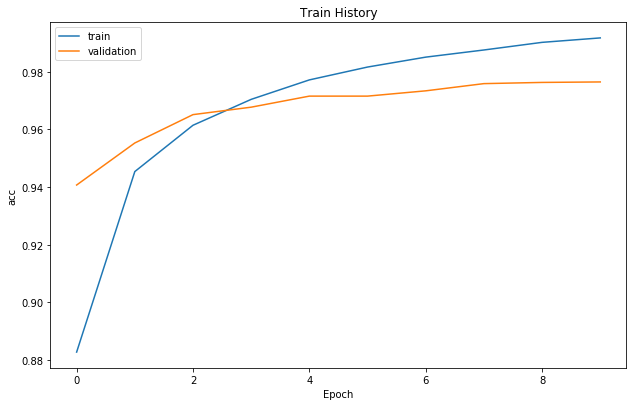

In [15]:
show_train_history(train_history,'acc','val_acc')

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


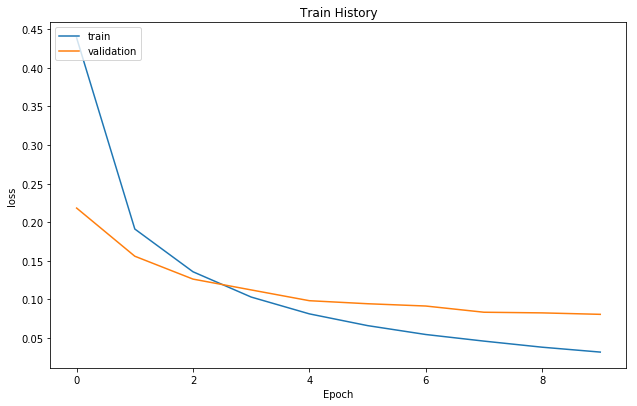

In [16]:
show_train_history(train_history,'loss','val_loss')

In [17]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 24us/step
accuracy= 0.9762


In [22]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[idx], cmap='binary')
        title = "lable="+str(labels[idx])
        if len(prediction) > 0:
            title +=",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

In [23]:
prediction = model.predict_classes(x_test)

In [24]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

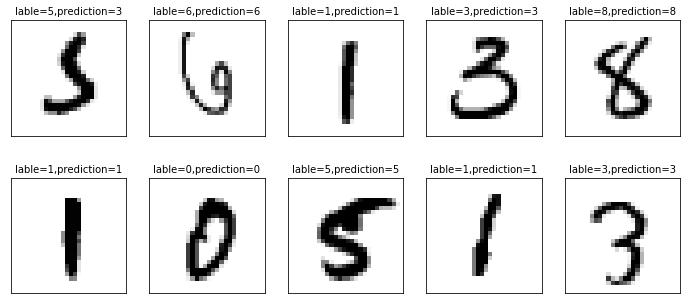

In [25]:
plot_images_labels_prediction(x_test_image, y_test_label,prediction,idx=340)

In [27]:
# 显示混淆矩阵
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,2,1,0,2,3,9,0
3,0,0,5,992,0,0,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,14,1,856,7,1,7,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,12,6,1,0,0,990,6,8
8,5,0,3,6,2,1,1,2,953,1


In [28]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [29]:
# 查询真实值是5 但预测值是3 的数据
df[(df.label==5) & (df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


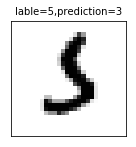

In [30]:
# 查看第340项结果
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)